In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
maintenance_data_org=pd.read_csv('Maintenance.csv')
maintenance_data_org.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
maintenance_data=maintenance_data_org.copy()

### Data preprocessing

In [5]:
## convert categorical to numerical

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
maintenance_data['Type']=le.fit_transform(maintenance_data['Type'])

In [8]:
maintenance_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [9]:
maintenance_data.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [10]:
maintenance_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [11]:
maintenance_data.iloc[:,[6,0,1,2,3,4,5]]

,Machine failure,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,2,298.1,308.6,1551,42.8,0
1,0,1,298.2,308.7,1408,46.3,3
2,0,1,298.1,308.5,1498,49.4,5
3,0,1,298.2,308.6,1433,39.5,7
4,0,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...
9995,0,2,298.8,308.4,1604,29.5,14
9996,0,0,298.9,308.4,1632,31.8,17
9997,0,2,299.0,308.6,1645,33.4,22
9998,0,0,299.0,308.7,1408,48.5,25


In [12]:
### Outlier correction

<AxesSubplot:>

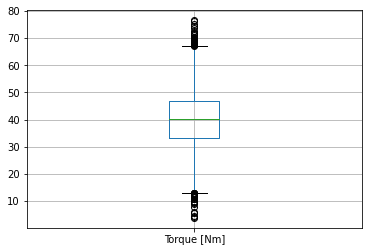

In [13]:
maintenance_data.boxplot(column= ['Torque [Nm]'])

In [14]:
Q1 = maintenance_data["Torque [Nm]"].quantile(0.25)

Q3 = maintenance_data["Torque [Nm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

13.599999999999994


In [15]:
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

12.800000000000011
67.19999999999999


<AxesSubplot:>

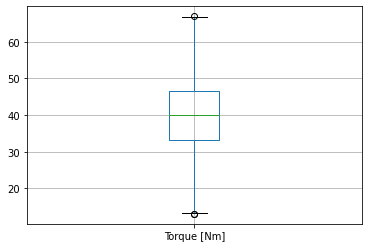

In [16]:
out= maintenance_data[((maintenance_data["Torque [Nm]"] < Lower_Fence) |(maintenance_data["Torque [Nm]"] > Upper_Fence))].index

maintenance_data = maintenance_data.drop(out, axis=0)
maintenance_data.boxplot(column= ['Torque [Nm]'])

<AxesSubplot:>

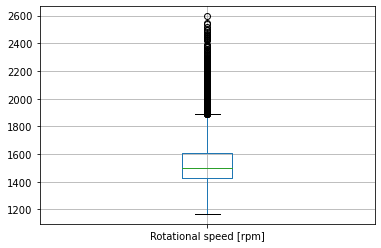

In [17]:
maintenance_data.boxplot(column= ['Rotational speed [rpm]'])

In [18]:
Q1 = maintenance_data["Rotational speed [rpm]"].quantile(0.25)

Q3 = maintenance_data["Rotational speed [rpm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

187.0


In [19]:
Lower_Fence1 = Q1 - (1.5 * IQR)

Upper_Fence1 = Q3 + (1.5 * IQR)

print(Lower_Fence1)

print(Upper_Fence1)

1143.5
1891.5


<AxesSubplot:>

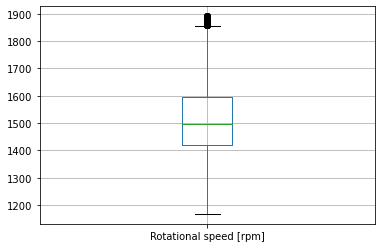

In [20]:
out1= maintenance_data[((maintenance_data["Rotational speed [rpm]"] < Lower_Fence1) |(maintenance_data["Rotational speed [rpm]"] > Upper_Fence1))].index

maintenance_data = maintenance_data.drop(out1, axis=0)
maintenance_data.boxplot(column= ['Rotational speed [rpm]'])

In [21]:
maintenance_data.corr()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Type,1.000000,0.016401,0.011979,-0.005571,0.005371,-0.002634,-0.011767
Air temperature [K],0.016401,1.000000,0.875531,0.012881,-0.006591,0.015566,0.091951
Process temperature [K],0.011979,0.875531,1.000000,0.016485,-0.011388,0.015332,0.039451
Rotational speed [rpm],-0.005571,0.012881,0.016485,1.000000,-0.892287,0.007008,-0.172143
Torque [Nm],0.005371,-0.006591,-0.011388,-0.892287,1.000000,-0.006590,0.222470
Tool wear [min],-0.002634,0.015566,0.015332,0.007008,-0.006590,1.000000,0.119609
Machine failure,-0.011767,0.091951,0.039451,-0.172143,0.222470,0.119609,1.000000


In [22]:
maintenance_data.drop(['Rotational speed [rpm]'], axis=1, inplace=True)

In [23]:
maintenance_data.head()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,42.8,0,0
1,1,298.2,308.7,46.3,3,0
2,1,298.1,308.5,49.4,5,0
3,1,298.2,308.6,39.5,7,0
4,1,298.2,308.7,40.0,9,0


In [24]:
#standardization of the data
from sklearn.preprocessing import StandardScaler
 
data = maintenance_data
scale= StandardScaler()
 
scaled_data = scale.fit_transform(data)
print(scaled_data)


[[ 1.33227154 -0.94912234 -0.94562027  0.22397395 -1.698936   -0.16978653]
 [-0.33092976 -0.89900715 -0.87809773  0.61708349 -1.65175497 -0.16978653]
 [-0.33092976 -0.94912234 -1.01314281  0.96526621 -1.62030096 -0.16978653]
 ...
 [ 1.33227154 -0.49808569 -0.94562027 -0.83180593 -1.35294184 -0.16978653]
 [-1.99413105 -0.49808569 -0.87809773  0.86418091 -1.30576081 -0.16978653]
 [ 1.33227154 -0.49808569 -0.87809773 -0.06805027 -1.22712578 -0.16978653]]


In [25]:
maintenance_data.describe()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
count,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000
mean,1.198972,299.993882,310.000451,40.805877,108.026655,0.028020
std,0.601282,1.995508,1.481065,8.903838,63.588225,0.165038
min,0.000000,295.300000,305.700000,20.100000,0.000000,0.000000
25%,1.000000,298.300000,308.800000,34.200000,53.000000,0.000000
50%,1.000000,300.100000,310.100000,40.600000,108.000000,0.000000
75%,2.000000,301.500000,311.100000,47.000000,162.000000,0.000000
max,2.000000,304.500000,313.800000,67.000000,253.000000,1.000000


In [26]:
## Upsample

In [27]:
#!pip install -U imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(maintenance_data.iloc[:,0:], maintenance_data['Machine failure'])

In [30]:
from collections import Counter
print('Original dataset shape %s' % Counter(maintenance_data['Machine failure']))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 9262, 1: 267})
Resampled dataset shape Counter({0: 9262, 1: 9262})


In [31]:
maintenance_data = pd.concat([y_res, X_res], axis=1)
maintenance_data.head()

,Machine failure,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,0,2,298.1,308.6,42.8,0,0
1,0,1,298.2,308.7,46.3,3,0
2,0,1,298.1,308.5,49.4,5,0
3,0,1,298.2,308.6,39.5,7,0
4,0,1,298.2,308.7,40.0,9,0


In [32]:
maintenance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Machine failure          18524 non-null  int64  
 1   Type                     18524 non-null  int32  
 2   Air temperature [K]      18524 non-null  float64
 3   Process temperature [K]  18524 non-null  float64
 4   Torque [Nm]              18524 non-null  float64
 5   Tool wear [min]          18524 non-null  int64  
 6   Machine failure          18524 non-null  int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 940.8 KB


### Splitting

In [39]:
train = maintenance_data.iloc[:,:5] 
(train)
test = maintenance_data.iloc[:,5]
test

0          0
1          3
2          5
3          7
4          9
        ... 
18519    216
18520    207
18521    218
18522    189
18523    189
Name: Tool wear [min], Length: 18524, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2)

### Model Building

In [35]:
model = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
         GradientBoostingClassifier(),SVC()]

for i in model:
    print(i)
    model=i
    model.fit(x_train_un,y_train_un)
    y_pred=model.predict(x_test_un)
    print('accuracyscore is    : ',round(accuracy_score(y_test_un,y_pred),3))
    print('precision is        : ',round(precision_score(y_test_un,y_pred),3))
    print('AUc score is        : ',round(roc_auc_score(y_test_un,y_pred),3))
    print('recall value is     : ',round(recall_score(y_test_un,y_pred),3))
    print('classification report is: \n', classification_report(y_test_un,y_pred))
    confu_matrix=confusion_matrix(y_test_un,y_pred)
    sns.heatmap(confu_matrix,annot=True)
    plt.show()

LogisticRegression()


ValueError: y should be a 1d array, got an array of shape (14819, 2) instead.